## PyTorch Intro For Beginners

PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library. Torch is an open source ML library used for creating deep neural networks and is written in the Lua scripting language. It's one of the preferred platforms for deep learning research.

* [PyTorch Basics](#1)
* [Linear Regression](#2)
* [Logistic Regression](#3)
* [Convolutional Neural Networks (CNNs)](#4)
* [Recurrent Neural Networks (RNNs)](#5)
* [Long Short Term Memory (LSTM)](#6)
* [Using GPU on PyTorch](#7)
* [Result](#8)

<a id = "1"></a>
### PyTorch Basics

In [1]:
# pytorch arrays
import torch
array = [[4,3,3],[1,2,5]]
tensor = torch.Tensor(array)
print("Array shape: ",tensor.shape)
print("Array type: ",tensor.type)
print(tensor)

Array shape:  torch.Size([2, 3])
Array type:  <built-in method type of Tensor object at 0x7ffba67d3bf0>
tensor([[4., 3., 3.],
        [1., 2., 5.]])


In [2]:
# pytorch ones
print(torch.ones((3,4)))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [3]:
# pytorch random
print(torch.rand((3,4)))

tensor([[0.9121, 0.8208, 0.0870, 0.1105],
        [0.5815, 0.2032, 0.6358, 0.9228],
        [0.9980, 0.8192, 0.8905, 0.6899]])


In [4]:
# random numpy array
import numpy as np
array = np.random.rand(2,2)
print("{} \n{}".format(type(array), array))

# from numpy to torch tensor
torch_tensor = torch.from_numpy(array)
print("{}\n".format(torch_tensor))

# tensor to numpy
array = torch_tensor.numpy()
print("{}\n".format(array))

<class 'numpy.ndarray'> 
[[0.51743723 0.86000307]
 [0.64916454 0.5647909 ]]
tensor([[0.5174, 0.8600],
        [0.6492, 0.5648]], dtype=torch.float64)

[[0.51743723 0.86000307]
 [0.64916454 0.5647909 ]]



##### Basic Mathematical Operations

In [5]:
# create tensor
tensor = torch.ones((3,3))
print(tensor)

# resize
print(tensor.view(tensor.shape[0] * tensor.shape[1]))

# add
print("Addition: {}\n".format(torch.add(tensor, tensor)))

# subtraction
print("Subtraction: {}\n".format(torch.sub(tensor, tensor)))

# element-wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor, tensor)))

# element-wise division
print("Element wise division: {}\n".format(torch.div(tensor, tensor)))

# Mean
tensor = torch.Tensor([213,45,34,567,88,67])
print("Mean: {}\n".format(tensor.mean()))

# Standard deviation
print("Standard deviation: {}\n".format(tensor.std()))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])
Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 169.0

Standard deviation: 205.380615234375



##### Variables

The difference between variables and tensors is the variables accumulate gradients. For backpropagation we need variables..

In [6]:
# import variables from pytorch lib
from torch.autograd import Variable
# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

In [7]:
# basic backpropagation
# lets assume we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print("y = ",y)

# recap o equation o = 1/2*sum(y)
o = 1/2*sum(y)
print("o = ",o)

# backward
o.backward()

# gradients
x.grad

y =  tensor([ 4., 16.], grad_fn=<PowBackward0>)
o =  tensor(10., grad_fn=<MulBackward0>)


tensor([2., 4.])

<a id = "2"></a>
### Linear Regression

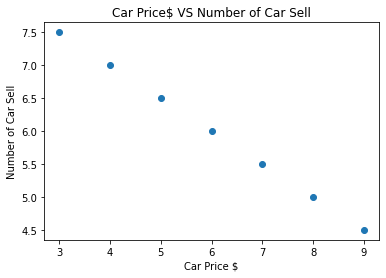

In [8]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

In [9]:
# libraries
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

epoch: 0, loss: 31.85201072692871
epoch: 50, loss: 5.752820014953613
epoch: 100, loss: 3.8874218463897705
epoch: 150, loss: 2.6268937587738037
epoch: 200, loss: 1.7751020193099976
epoch: 250, loss: 1.1995116472244263
epoch: 300, loss: 0.8105611205101013
epoch: 350, loss: 0.5477308034896851
epoch: 400, loss: 0.37012454867362976
epoch: 450, loss: 0.2501089870929718
epoch: 500, loss: 0.1690090149641037
epoch: 550, loss: 0.1142064705491066
epoch: 600, loss: 0.07717385143041611
epoch: 650, loss: 0.05214941129088402
epoch: 700, loss: 0.035239703953266144
epoch: 750, loss: 0.02381322719156742
epoch: 800, loss: 0.016091350466012955
epoch: 850, loss: 0.010873713530600071
epoch: 900, loss: 0.0073478855192661285
epoch: 950, loss: 0.0049652946181595325
epoch: 1000, loss: 0.0033553987741470337


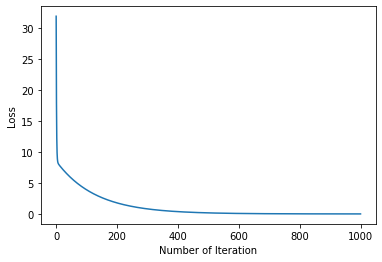

In [10]:
# create Linear Regression class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        # accessing all things inherited from nn.Module
        super(LinearRegression,self).__init__()
        # linear function from nn.Module
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# MSE
mse = nn.MSELoss()

# Optimization
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    
    # optimization
    optimizer.zero_grad()
    
    # forward to get output
    results = model(car_price_tensor)
    
    # calculate loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss for each 50 iterations
    if(iteration % 50 == 0):
        print("epoch: {}, loss: {}".format(iteration, loss.data))
        
plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.show()

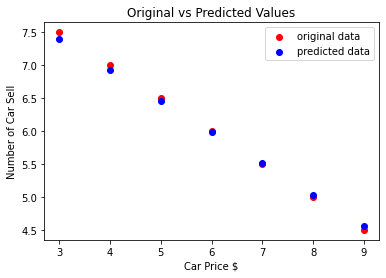

In [11]:
# predicted car prices
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label = "original data", color = "red")
plt.scatter(car_prices_array, predicted, label = "predicted data", color = "blue")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted Values")
plt.show()

<a id = "3"></a>
### Logistic Regression

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k

In this logistic regression equation, logit(pi) is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Once the optimal coefficient (or coefficients if there is more than one independent variable) is found, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability. For binary classification, a probability less than .5 will predict 0 while a probability greater than 0 will predict 1.  After the model has been computed, it’s best practice to evaluate the how well the model predicts the dependent variable, which is called goodness of fit. The Hosmer–Lemeshow test is a popular method to assess model fit.

Source: [https://www.ibm.com/topics/logistic-regression]

In [12]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
# Prepare dataset
# load data
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv", dtype = np.float32)

# split data into features (pixels) and labels (numbers from 0 to 9)
target = train_df.label.values

# normalization of pixels
features = train_df.loc[:,train_df.columns != "label"].values/255

# train-test split. train data: 80% and test data: 20
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

# create tensors for train set
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create tensors for test set
x_test = torch.from_numpy(x_test)
y_test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(x_train) / batch_size)
num_epochs = int(num_epochs)

# pytorch train and test sets
train = torch.utils.data.TensorDataset(x_train, y_train)
test = torch.utils.data.TensorDataset(x_test, y_test)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

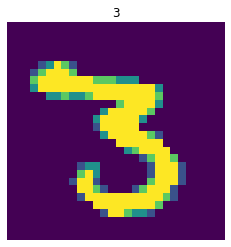

In [14]:
# visualize one of the image
plt.imshow(features[13].reshape(28,28))
plt.axis("off")
plt.title(str(int(target[13])))
plt.savefig("graph.png")
plt.show()

In [15]:
# create logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
# Instantiate model class
input_dim = 28 * 28  # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create model
model = LogisticRegressionModel(input_dim, output_dim)

# cross entropy loss
error = nn.CrossEntropyLoss()

# SGD optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [16]:
# training model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # calculate gradients
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        count += 1
        
        # prediction
        if count % 50 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            # predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                
                # forward propagation
                outputs = model(test)
                
                # get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # total number of labels
                total += len(labels)
                
                # total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # print loss
            print("Iteration: {} Loss: {} Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500 Loss: 1.8168820142745972 Accuracy: 66.5%
Iteration: 1000 Loss: 1.6109713315963745 Accuracy: 74.98809814453125%
Iteration: 1500 Loss: 1.3011137247085571 Accuracy: 78.21428680419922%
Iteration: 2000 Loss: 1.2069765329360962 Accuracy: 80.21428680419922%
Iteration: 2500 Loss: 1.0379571914672852 Accuracy: 80.95237731933594%
Iteration: 3000 Loss: 0.9332837462425232 Accuracy: 81.94047546386719%
Iteration: 3500 Loss: 0.8894906640052795 Accuracy: 82.5%
Iteration: 4000 Loss: 0.7514604926109314 Accuracy: 82.9047622680664%
Iteration: 4500 Loss: 0.9589231014251709 Accuracy: 83.44047546386719%
Iteration: 5000 Loss: 0.7952845096588135 Accuracy: 83.75%
Iteration: 5500 Loss: 0.7554088830947876 Accuracy: 84.11904907226562%
Iteration: 6000 Loss: 0.8651386499404907 Accuracy: 84.47618865966797%
Iteration: 6500 Loss: 0.6461273431777954 Accuracy: 84.75%
Iteration: 7000 Loss: 0.7137735486030579 Accuracy: 85.0%
Iteration: 7500 Loss: 0.6412955522537231 Accuracy: 85.14286041259766%
Iteration: 8000

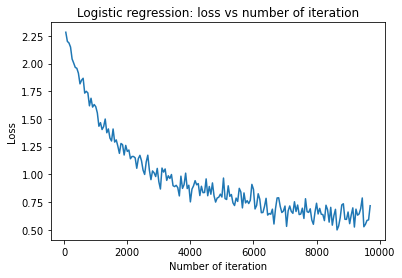

In [17]:
# evaluation
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic regression: loss vs number of iteration")
plt.show()